<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/Bike_Sharing_RA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Bike Sharing Demand 실습
https://www.kaggle.com/c/bike-sharing-demand
* Bike_Sharing_Demand.csv(10,886,*12)
 * datetime : Date + Timestamp
 * season: 1(봄),2(여름),3(가을),4(겨울)
 * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
 * workingday : 1(토요일,일요일 및 휴일이 아닌 주중),0(주말 및 휴일)
 * weather : 1(맑음, 약간 흐림), 2(안개 흐림) 3(가벼운 눈/비 + 천둥), 4(심한 눈/비. 천둥/번개)
 * temp : 온도(섭씨)
 * atemp : 체감온도(섭씨)
 * humidity : 습도
 * windspeed : 풍속
 * casual : 사전 등록되지 않은 사용자 대여 횟수
 * registered : 사전 등록된 사용자 대여 횟수
 * count : 총 대여횟수 => y

* 조건
1. Bike_Sharing_RA_작성자이름.ipynb
2. 탐색적 데이터 분석 및 시각화
3. y -> 'count'
4. train_test_split : 7:3, 2045 적용
5. 수치 예측 모델링 수행(3가지)
6. Metric -> np.sqrt(mse)
7. 성능이 가장 좋은 모델 선택

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBRegressor
#from lightgbm import  LGBMRegressor

## 0.데이터 가져오기
* 'Bike_Sharing_demand.csv' Github에서 읽어오기

In [2]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1.데이터 전처리
> 1) 'String' -> 'Data'
* 'year','month','day','hour' 추출

In [6]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x : x.hour)

DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


> 2) Drop Columns
* 'datetime','casual','registered'

In [7]:
drop_columns = ['datetime', 'casual', 'registered']

DF.drop(drop_columns, axis = 1, inplace = True)

DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 2.데이터 살펴보기

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [9]:
DF.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [11]:
DF.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [12]:
DF.year.value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

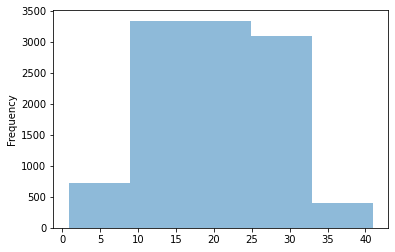

In [17]:
DF['temp'].plot(kind = 'hist', bins = 5, alpha = 0.5)

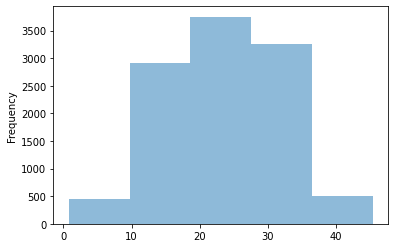

In [15]:
DF['atemp'].plot(kind = 'hist', bins = 5, alpha = 0.5)

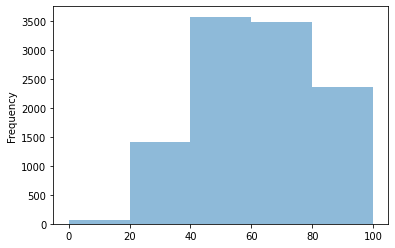

In [18]:
DF['humidity'].plot(kind = 'hist', bins = 5, alpha = 0.5)

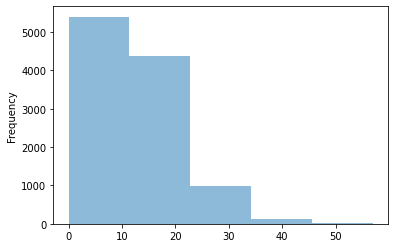

In [20]:
DF['windspeed'].plot(kind = 'hist', bins = 5, alpha = 0.5)

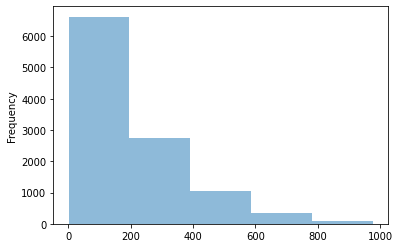

In [26]:
DF['count'].plot(kind = 'hist', bins = 5, alpha = 0.5)

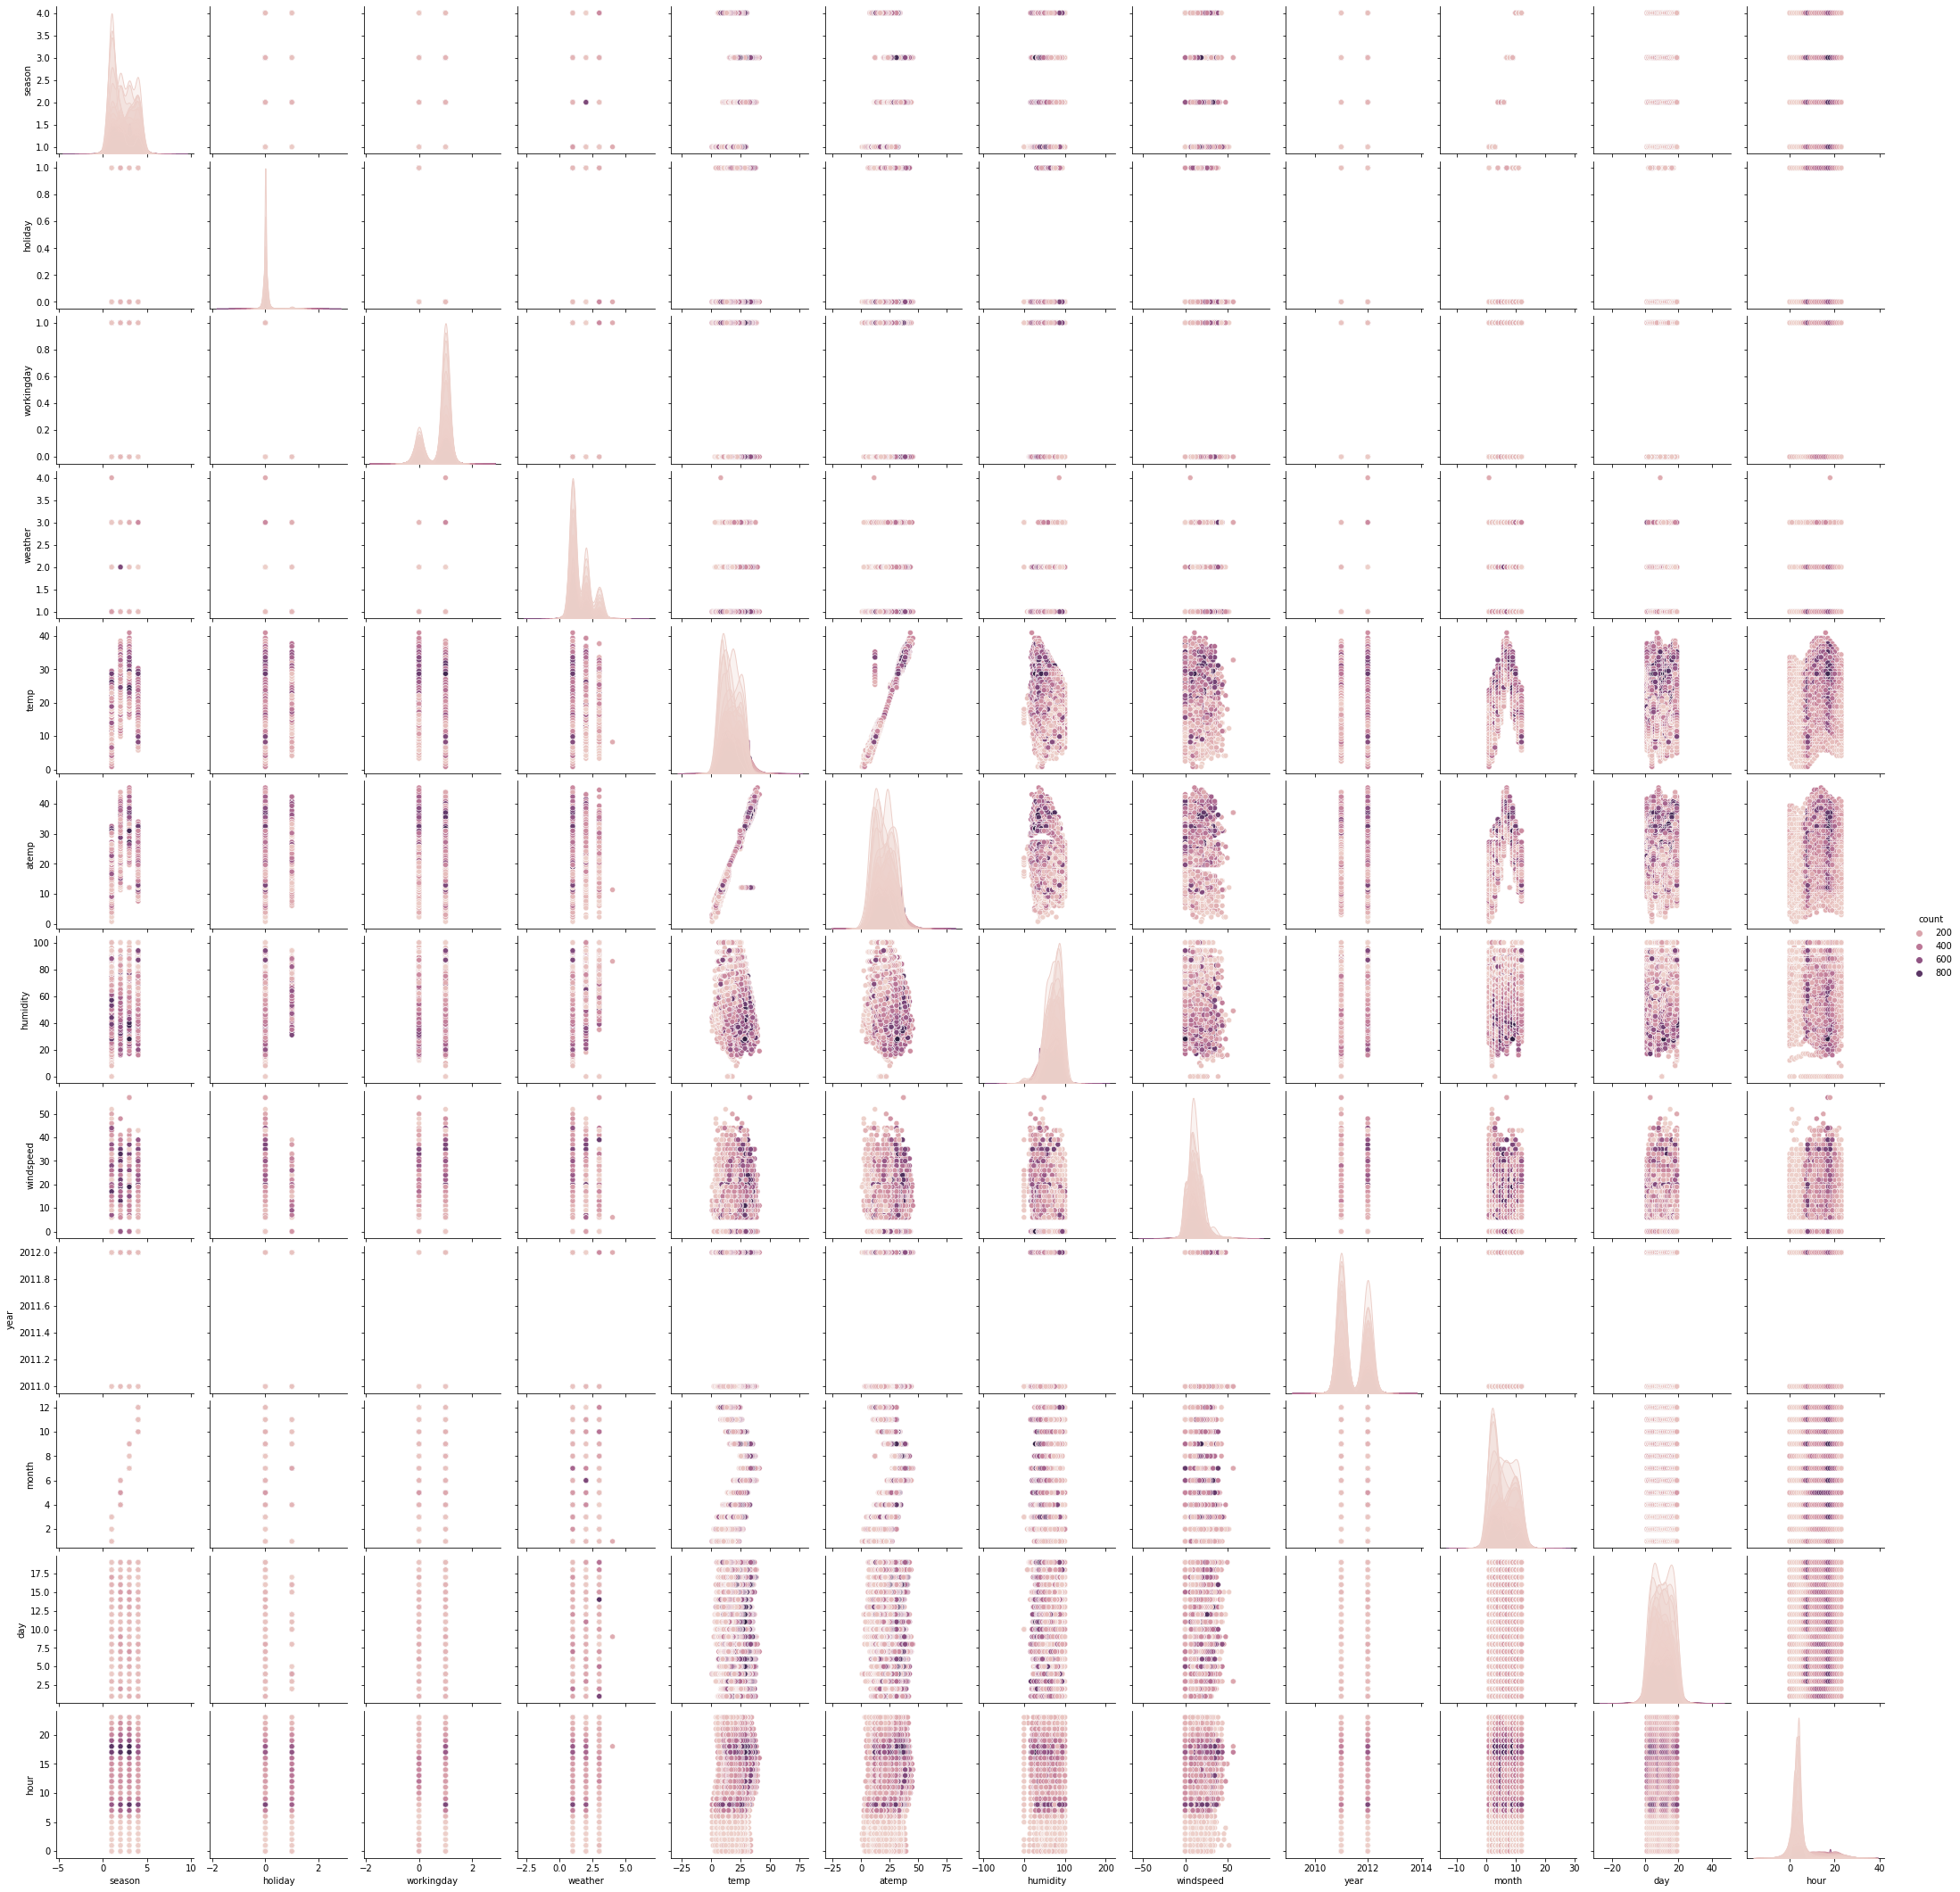

In [27]:
sns.pairplot(hue='count', data = DF)
plt.show()

In [433]:
corr = DF[['count','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour']].corr()
print(corr)
#holiday windspeed day workingday weather season month year humidity atemp temp hour 순으로 절댓값 낮음


               count    season   holiday  ...     month       day      hour
count       1.000000  0.163439 -0.005393  ...  0.166862  0.019826  0.400601
season      0.163439  1.000000  0.029368  ...  0.971524  0.001729 -0.006546
holiday    -0.005393  0.029368  1.000000  ...  0.001731 -0.015877 -0.000354
workingday  0.011594 -0.008126 -0.250491  ... -0.003394  0.009829  0.002780
weather    -0.128655  0.008879 -0.007074  ...  0.012144 -0.007890 -0.022740
temp        0.394454  0.258689  0.000295  ...  0.257589  0.015551  0.145430
atemp       0.389784  0.264744 -0.005215  ...  0.264173  0.011866  0.140343
humidity   -0.317371  0.190610  0.001929  ...  0.204537 -0.011335 -0.278011
windspeed   0.101369 -0.147121  0.008409  ... -0.150192  0.036157  0.146631
year        0.260403 -0.004797  0.012021  ... -0.004932  0.001800 -0.004234
month       0.166862  0.971524  0.001731  ...  1.000000  0.001974 -0.006818
day         0.019826  0.001729 -0.015877  ...  0.001974  1.000000  0.001132
hour        

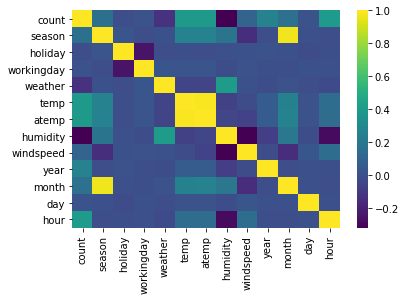

In [434]:
sns.heatmap(corr, cmap='viridis')
plt.show()

## 3.데이터 분할

In [435]:
X = DF[['season',
        'holiday',
        'workingday',
        'weather',
        'temp',
        'atemp',
        'humidity',
        'windspeed',
        'year',
        'month',
        'day',
        'hour'
        ]]
y = DF['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ' , X_test.shape, y_test.shape)

Train Data :  (7620, 12) (7620,)
Test Data :  (3266, 12) (3266,)


## 4.모델링


> 1) Ridge Regression

In [436]:
%%time

model_RG = Ridge(normalize = True,
           alpha = 0.001,
           solver = 'cholesky'
           )

model_RG.fit(X_train, y_train)

CPU times: user 6.41 ms, sys: 4.01 ms, total: 10.4 ms
Wall time: 9.87 ms


In [437]:
mean_squared_error(y_test, model_RG.predict(X_test))

20225.57723587077

In [438]:
print('{:.3f}'.format(model_RG.score(X_train, y_train)))

0.393


In [439]:
print('{:.3f}'.format(model_RG.score(X_test, y_test)))

0.378


> 2) Random Forest Regressor

In [395]:
%%time

model_RFR = RandomForestRegressor(n_estimators = 1000,
                            max_features = 10,
                            max_depth = 15,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)

model_RFR.fit(X_train, y_train)

CPU times: user 34.2 s, sys: 1.19 s, total: 35.4 s
Wall time: 18.9 s


In [396]:
mean_squared_error(y_test, model_RFR.predict(X_test))

1845.3703072839419

In [397]:
print('{:.3f}'.format(model_RFR.score(X_train, y_train)))

0.988


In [398]:
print('{:.3f}'.format(model_RFR.score(X_test, y_test)))

0.943


In [399]:
model_RFR.feature_importances_

array([0.00893754, 0.00269374, 0.07608828, 0.0150511 , 0.05385155,
       0.07431804, 0.03579815, 0.00917983, 0.08326477, 0.04367292,
       0.0116269 , 0.58551719])

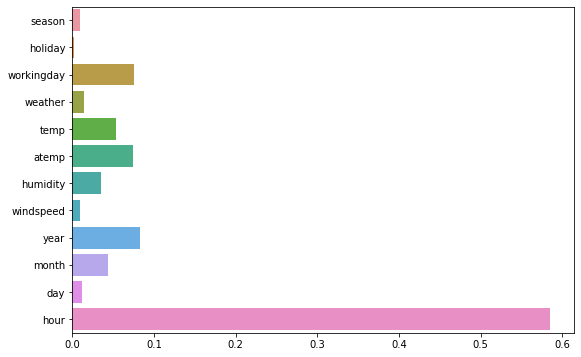

In [400]:
plt.figure(figsize = (9,6))
sns.barplot(model_RFR.feature_importances_,
            ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour'])
plt.show()

In [199]:
%%time

model_ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 100,
                        learning_rate = 0.6,
                        random_state = 2045)

model_ABR.fit(X_train, y_train)

CPU times: user 1.02 s, sys: 2.86 ms, total: 1.02 s
Wall time: 1.02 s


In [200]:
mean_squared_error(y_test, model_ABR.predict(X_test))

8177.141634290008

In [201]:
print('{:.3f}'.format(model_ABR.score(X_train, y_train)))

0.748


In [202]:
print('{:.3f}'.format(model_ABR.score(X_test, y_test)))

0.749


In [203]:
model_ABR.feature_importances_

array([8.37298506e-03, 3.17834704e-05, 7.98120909e-02, 4.55432267e-02,
       4.74793749e-02, 5.47802539e-02, 1.05975301e-01, 1.17451494e-02,
       7.52592175e-02, 1.02597885e-01, 5.97708281e-03, 4.62425649e-01])

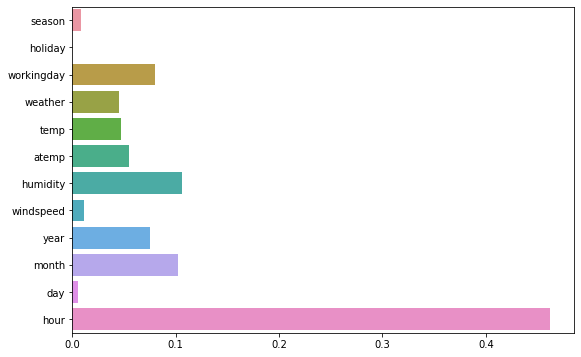

In [204]:
plt.figure(figsize = (9,6))
sns.barplot(model_ABR.feature_importances_,
            ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour'])
plt.show()

## 5.결과종합

In [447]:
result = pd.DataFrame(data = {'name' : ['model_RG','model_RFR','model_ABR'],
                                  'np.sqrt(mse)' : [np.sqrt(mean_squared_error(y_test, model_RG.predict(X_test))),
                                                    np.sqrt(mean_squared_error(y_test, model_RFR.predict(X_test))),
                                                    np.sqrt(mean_squared_error(y_test, model_ABR.predict(X_test)))]})

result

,name,np.sqrt(mse)
0,model_RG,142.216656
1,model_RFR,42.957774
2,model_ABR,90.427549


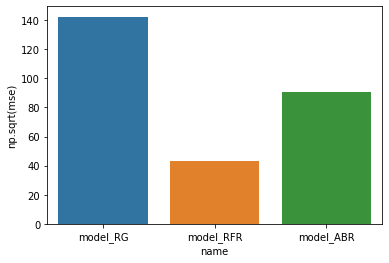

In [450]:
sns.barplot(data = result, x = 'name', y = 'np.sqrt(mse)')

plt.show()